## 試験環境

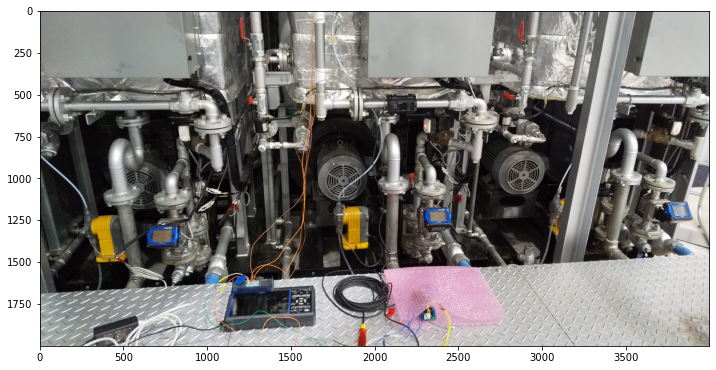

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(12,10))
plt.imshow(mpimg.imread("./DSC_2306.jpg"))

### 購入したバイモルフ振動子は振動量が微小で振動源としては使いづらい。
### しかし、バイモルフ自体は圧電センサーであるため、センサーとして利用する事が可能。
### そこで今回、バイモルフ（振動子）を振動センサーとして利用した。
### 同じ給水配管にバイモルフを2つ取り付け、通水時の振動の違いによって、通水量と相関があるか確認する。
### バイモルフ2つをそれぞれ台に固定し、それを給水配管に取り付ける。（バイモルフの間隔は200㎜）
### 取り付け箇所は縦配管。

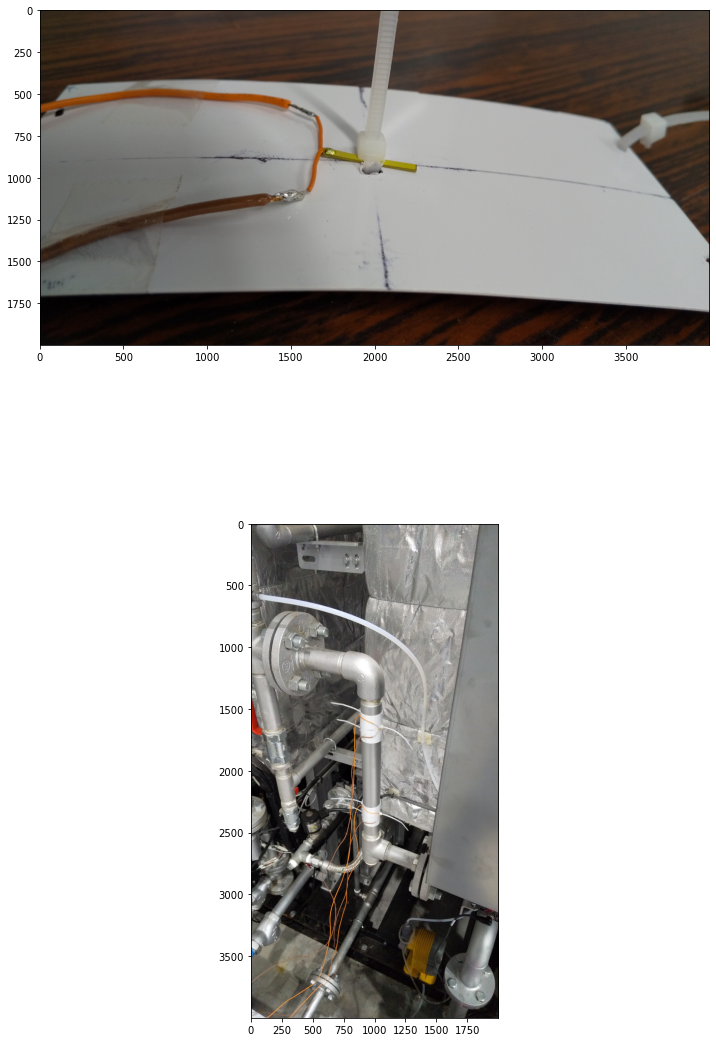

In [2]:
plt.figure(figsize=(12,20))
plt.subplot(2,1,1)
plt.imshow(mpimg.imread("./DSC_2307.jpg"))
plt.subplot(2,1,2)
plt.imshow(mpimg.imread("./DSC_2304.jpg"))

### データロガーでバイモルフの出力を記録する。
### データロガーの型式はＨＩＯＫＩ LR8450。バイモルフはCH2、CH3に取り付け。
### CH2のバイモルフは縦配管の下側のもので、CH3のバイモルフは縦配管の上側のものとした。
### 　
### ボイラ技術部から借りた流量計FD-Q32Cから瞬時流量(0-7200L/h)を4-20mAで取る。（シャント抵抗は249.3Ω）
### 瞬時流量計はデータロガーのCH1に取り付け。

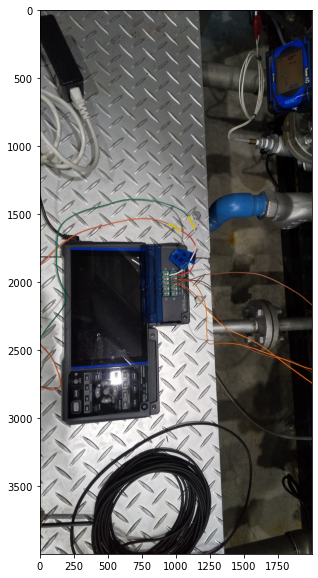

In [3]:
plt.figure(figsize=(12,10))
plt.imshow(mpimg.imread("./DSC_2305.jpg"))

### 水頭圧で通水。流量の変更は手元のバルブを操作して行った。
### 流量範囲は0-2200L/h程度。

### データロガーで記録した値を確認してみる。

In [6]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [7]:
os.getcwd()

'C:\\Users\\User\\Desktop'

In [8]:
#ファイル選択
df_recivedata = pd.read_csv(r"biemolf002.CSV")

#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,瞬時流量,加速度センサー1,加速度センサー2,Event
0,'21-11-22 14:32:58.095,1.00,-0.0580,-0.0195,0
1,'21-11-22 14:32:58.105,1.02,-0.0095,-0.0165,0
2,'21-11-22 14:32:58.115,1.06,0.0785,0.0595,0
3,'21-11-22 14:32:58.125,1.00,0.0455,0.0225,0
4,'21-11-22 14:32:58.135,1.04,0.0270,0.0060,0


,Time,瞬時流量,加速度センサー1,加速度センサー2,Event
17287,'21-11-22 14:35:50.965,0.996,0.0770,0.0515,0
17288,'21-11-22 14:35:50.975,0.992,0.0545,0.0335,0
17289,'21-11-22 14:35:50.985,0.986,0.0180,-0.0010,0
17290,'21-11-22 14:35:50.995,0.991,0.0875,0.0710,0
17291,'21-11-22 14:35:51.005,0.967,0.0035,-0.0125,0


### 「瞬時流量」は4-20mAに249.3Ωを掛けて電圧値に直した値で、単位はV。
### 「加速度センサー1/2」はバイモルフの出力で、単位はV。

In [9]:
df_recivedata.count()

Time        17292
瞬時流量        17292
加速度センサー1    17292
加速度センサー2    17292
Event       17292
dtype: int64

### データフレームの値に欠損値は無い。
### 瞬時流量を実際の流量に書き直したカラムを追加したい。

In [10]:
#dfにカラムを追加（計算値）
df_recivedata['実際の瞬時流量'] = ((df_recivedata['瞬時流量'] * 250 / 249.3) - 1) * 7200 / 4

#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,瞬時流量,加速度センサー1,加速度センサー2,Event,実際の瞬時流量
0,'21-11-22 14:32:58.095,1.00,-0.0580,-0.0195,0,5.054152
1,'21-11-22 14:32:58.105,1.02,-0.0095,-0.0165,0,41.155235
2,'21-11-22 14:32:58.115,1.06,0.0785,0.0595,0,113.357401
3,'21-11-22 14:32:58.125,1.00,0.0455,0.0225,0,5.054152
4,'21-11-22 14:32:58.135,1.04,0.0270,0.0060,0,77.256318


,Time,瞬時流量,加速度センサー1,加速度センサー2,Event,実際の瞬時流量
17287,'21-11-22 14:35:50.965,0.996,0.0770,0.0515,0,-2.166065
17288,'21-11-22 14:35:50.975,0.992,0.0545,0.0335,0,-9.386282
17289,'21-11-22 14:35:50.985,0.986,0.0180,-0.0010,0,-20.216606
17290,'21-11-22 14:35:50.995,0.991,0.0875,0.0710,0,-11.191336
17291,'21-11-22 14:35:51.005,0.967,0.0035,-0.0125,0,-54.512635


### マイナスの瞬時流量は0にFIXする

In [11]:
df_recivedata.loc[df_recivedata['実際の瞬時流量'] < 0, '実際の瞬時流量'] = 0 

In [12]:
#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,瞬時流量,加速度センサー1,加速度センサー2,Event,実際の瞬時流量
0,'21-11-22 14:32:58.095,1.00,-0.0580,-0.0195,0,5.054152
1,'21-11-22 14:32:58.105,1.02,-0.0095,-0.0165,0,41.155235
2,'21-11-22 14:32:58.115,1.06,0.0785,0.0595,0,113.357401
3,'21-11-22 14:32:58.125,1.00,0.0455,0.0225,0,5.054152
4,'21-11-22 14:32:58.135,1.04,0.0270,0.0060,0,77.256318


,Time,瞬時流量,加速度センサー1,加速度センサー2,Event,実際の瞬時流量
17287,'21-11-22 14:35:50.965,0.996,0.0770,0.0515,0,0.0
17288,'21-11-22 14:35:50.975,0.992,0.0545,0.0335,0,0.0
17289,'21-11-22 14:35:50.985,0.986,0.0180,-0.0010,0,0.0
17290,'21-11-22 14:35:50.995,0.991,0.0875,0.0710,0,0.0
17291,'21-11-22 14:35:51.005,0.967,0.0035,-0.0125,0,0.0


### 必要ない分は削除する。

In [13]:
df_recivedata = df_recivedata.drop(["Time", "瞬時流量", "Event"], axis = 1)

df_recivedata

,加速度センサー1,加速度センサー2,実際の瞬時流量
0,-0.0580,-0.0195,5.054152
1,-0.0095,-0.0165,41.155235
2,0.0785,0.0595,113.357401
3,0.0455,0.0225,5.054152
4,0.0270,0.0060,77.256318
...,...,...,...
17287,0.0770,0.0515,0.000000
17288,0.0545,0.0335,0.000000
17289,0.0180,-0.0010,0.000000
17290,0.0875,0.0710,0.000000


### 日本語を英語に直し、散布図行列を書いてみる

In [14]:
df_recivedata.rename(columns={'加速度センサー1': 'ACC_1', '加速度センサー2': 'ACC_2', '実際の瞬時流量': 'W_Moment'}, inplace=True)
df_recivedata

,ACC_1,ACC_2,W_Moment
0,-0.0580,-0.0195,5.054152
1,-0.0095,-0.0165,41.155235
2,0.0785,0.0595,113.357401
3,0.0455,0.0225,5.054152
4,0.0270,0.0060,77.256318
...,...,...,...
17287,0.0770,0.0515,0.000000
17288,0.0545,0.0335,0.000000
17289,0.0180,-0.0010,0.000000
17290,0.0875,0.0710,0.000000


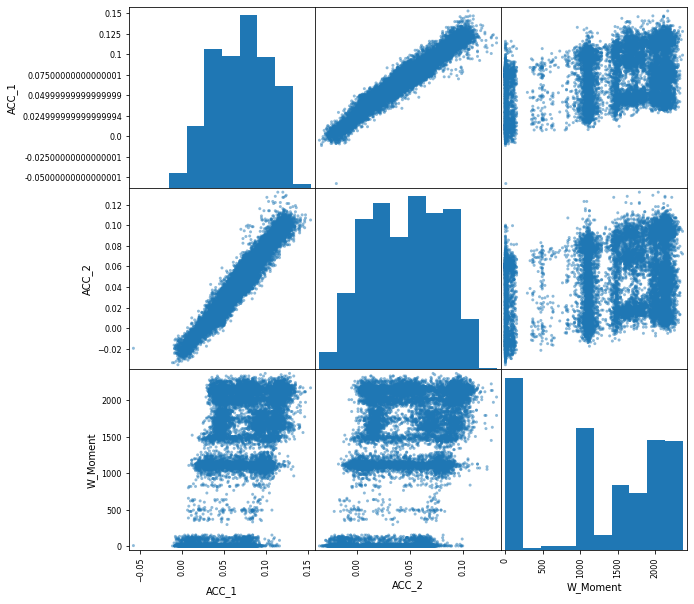

In [15]:
pd.plotting.scatter_matrix(df_recivedata, figsize=(10,10))
plt.show()

### うーん、傾向が見辛い感じが。。
### カラムを追加してみる。
### ACC_1+ACC_2は加算、ACC_１-ACC_２とACC_2-ACC_1はそれぞれ減算した値。
### ACC_１^2とACC_2^2はそれぞれの値を2乗した値。

In [16]:
df_recivedata['ACC_1 + ACC_2'] = df_recivedata['ACC_1'] + df_recivedata['ACC_2']
df_recivedata['ACC_1 - ACC_2'] = df_recivedata['ACC_1'] - df_recivedata['ACC_2']
df_recivedata['ACC_2 - ACC_1'] = df_recivedata['ACC_2'] - df_recivedata['ACC_1']
df_recivedata['ACC_1^2'] = df_recivedata['ACC_1'] * df_recivedata['ACC_1']
df_recivedata['ACC_2^2'] = df_recivedata['ACC_2'] * df_recivedata['ACC_2']

df_recivedata

,ACC_1,ACC_2,W_Moment,ACC_1 + ACC_2,ACC_1 - ACC_2,ACC_2 - ACC_1,ACC_1^2,ACC_2^2
0,-0.0580,-0.0195,5.054152,-0.0775,-0.0385,0.0385,0.003364,0.000380
1,-0.0095,-0.0165,41.155235,-0.0260,0.0070,-0.0070,0.000090,0.000272
2,0.0785,0.0595,113.357401,0.1380,0.0190,-0.0190,0.006162,0.003540
3,0.0455,0.0225,5.054152,0.0680,0.0230,-0.0230,0.002070,0.000506
4,0.0270,0.0060,77.256318,0.0330,0.0210,-0.0210,0.000729,0.000036
...,...,...,...,...,...,...,...,...
17287,0.0770,0.0515,0.000000,0.1285,0.0255,-0.0255,0.005929,0.002652
17288,0.0545,0.0335,0.000000,0.0880,0.0210,-0.0210,0.002970,0.001122
17289,0.0180,-0.0010,0.000000,0.0170,0.0190,-0.0190,0.000324,0.000001
17290,0.0875,0.0710,0.000000,0.1585,0.0165,-0.0165,0.007656,0.005041


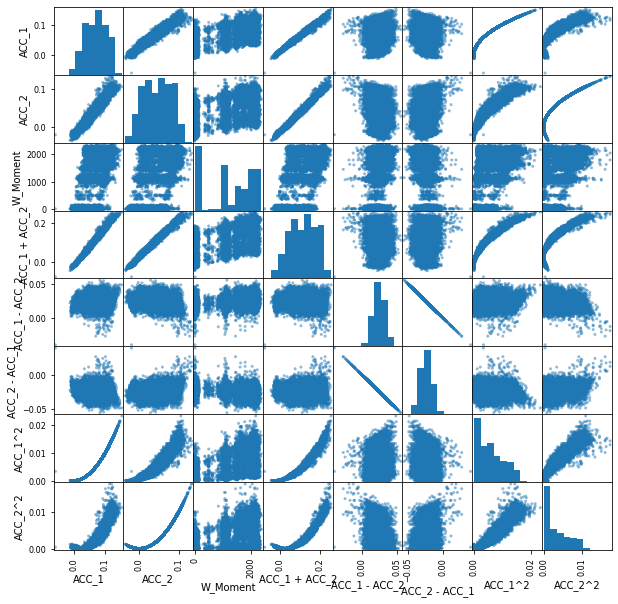

In [17]:
pd.plotting.scatter_matrix(df_recivedata, figsize=(10,10))
plt.show()

### 相関を見てみる。

In [18]:
df_recivedata.corr()

,ACC_1,ACC_2,W_Moment,ACC_1 + ACC_2,ACC_1 - ACC_2,ACC_2 - ACC_1,ACC_1^2,ACC_2^2
ACC_1,1.000000,0.971691,0.490424,0.992553,-0.077323,0.077323,0.968297,0.899847
ACC_2,0.971691,1.000000,0.378275,0.993234,-0.310681,0.310681,0.945738,0.937860
W_Moment,0.490424,0.378275,1.000000,0.436106,0.376766,-0.376766,0.463902,0.347705
ACC_1 + ACC_2,0.992553,0.993234,0.436106,1.000000,-0.198194,0.198194,0.963588,0.925880
ACC_1 - ACC_2,-0.077323,-0.310681,0.376766,-0.198194,1.000000,-1.000000,-0.095345,-0.337495
ACC_2 - ACC_1,0.077323,0.310681,-0.376766,0.198194,-1.000000,1.000000,0.095345,0.337495
ACC_1^2,0.968297,0.945738,0.463902,0.963588,-0.095345,0.095345,1.000000,0.954140
ACC_2^2,0.899847,0.937860,0.347705,0.925880,-0.337495,0.337495,0.954140,1.000000


### ヒートマップにして表示する。

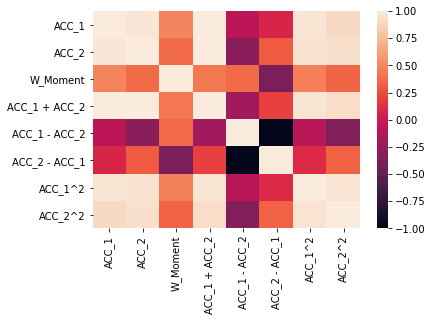

In [19]:
sns.heatmap(df_recivedata.corr())
plt.show()

### W_Momentとセンサ値（加工値も含む）相関は余り高くない。
### 取得済みの値で、簡単な回帰モデルで導出が出来るかチェックする。

In [20]:
x_v, y_v = df_recivedata[["ACC_1", "ACC_2", "ACC_1 + ACC_2", "ACC_1 - ACC_2", "ACC_2 - ACC_1", "ACC_1^2", "ACC_2^2"]].values, df_recivedata["W_Moment"].values
# W_Momentと説明変数との線形回帰

from sklearn.model_selection import train_test_split

#学習データを80％、テストデータは20％とする
x_train, x_test, y_train, y_test = train_test_split(x_v, y_v, test_size=0.2, random_state=1234)#テストに用いるデータを作成

#trainデータで学習する
Lregr = LinearRegression(fit_intercept=True)
Lregr.fit(x_train, y_train)#学習（学習用データで学習）

y_pred_test = Lregr.predict(x_test)#テストデータでyを予測
squared_error = 0.5 * np.sum((y_test - y_pred_test) ** 2)#二乗誤差出す
print('テストデータの二乗誤差 = {:.3f}'.format(squared_error))

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  
# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )
# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

テストデータの二乗誤差 = 650414156.122
MSE = 376070.631
MAE = 491.406
RMSE = 613.246


In [21]:
print(y_test)

[2044.76534296 1124.18772563 1033.93501805 ... 1467.14801444 2153.06859206
 1503.24909747]


### 結果は良くない。凡そ平均±500L/hのずれが出ている結果となった。
### 次は説明変数を標準化して学習してみる。

In [22]:
# 標準化操作
from sklearn.preprocessing import StandardScaler#インポート

stdsc = StandardScaler()
x_train_stand = stdsc.fit_transform(x_train)
x_test_stand  = stdsc.transform(x_test)#fitは上のを引き継ぐ

Lregr.fit(x_train_stand, y_train)#学習（学習用データで学習）

y_pred_test2 = Lregr.predict(x_test_stand)#テストデータでyを予測
squared_error2 = 0.5 * np.sum((y_test - y_pred_test2) ** 2)#二乗誤差出す
print('テストデータの二乗誤差 = {:.3f}'.format(squared_error2))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test2) 
print("MSE = %s"%round(mse, 3) )  
# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test2) 
print("MAE = %s"%round(mae, 3) )
# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

テストデータの二乗誤差 = 650447504.108
MSE = 376089.913
MAE = 491.453
RMSE = 613.262


### 結果は変わらず。
### 次はステップワイズ法で予測を行う。

Feature ranking: 
[1 4 2 1 3 1 1]


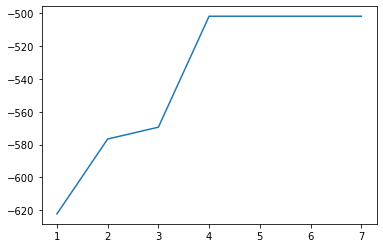

In [29]:
from sklearn.feature_selection import RFECV#ステップワイズ法のをインポート

#ステップワイズ法による特徴選択
Lregr = LinearRegression(fit_intercept=True)
# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は回帰なのでneg_mean_absolute_errorを評価指標に指定
Lregr_rfecv = RFECV(Lregr, cv = 10, scoring = 'neg_mean_absolute_error')#'neg_mean_squared_error')

Lregr_rfecv.fit(x_train_stand, y_train)#特徴選択を実行する

# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(Lregr_rfecv.ranking_))

# 特徴数とスコアの変化をプロット
# 負のMAEが評価基準になっており，値がゼロに近いほど汎化誤差は小さい
plt.plot(range(1, len(Lregr_rfecv.grid_scores_) + 1), Lregr_rfecv.grid_scores_)
plt.show()

### どうやら特徴（変数）取捨選択しても、線形回帰では精度上昇が望めない。
### 別の学習モデルで予測しなければ正確な値は求まらない。